In [69]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import math
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from datetime import date


In [70]:
df_precios = pd.DataFrame()

In [71]:
# Acciones
activos = ['ALSEA.MX','GRUMAB.MX','GCARSOA1.MX',
          'GFINBURO.MX','KOFUBL.MX','HERDEZ.MX']

# Numero de acciones
n = len(activos)

# Capital a invertir
Capital = 7000

In [72]:
activos

['ALSEA.MX',
 'GRUMAB.MX',
 'GCARSOA1.MX',
 'GFINBURO.MX',
 'KOFUBL.MX',
 'HERDEZ.MX']

In [ ]:
today = date.today()
print(today)

for i in activos:
    df_precios[i] = pd.DataFrame(yf.Ticker(i).history(start = '2022-1-1',end = today)['Close'])
df_precios


2024-12-26


,ALSEA.MX,GRUMAB.MX,GCARSOA1.MX,GFINBURO.MX,KOFUBL.MX,HERDEZ.MX
Date,,,,,,
2022-01-03 00:00:00-06:00,39.284531,245.455475,62.313992,24.530001,95.072487,37.545567
2022-01-04 00:00:00-06:00,40.356640,245.642426,62.747135,24.530001,95.930222,37.432899
2022-01-05 00:00:00-06:00,41.212364,244.214615,60.225304,24.400000,94.461037,37.273293
2022-01-06 00:00:00-06:00,41.094334,242.448608,60.109806,24.680000,94.121338,37.545567
2022-01-07 00:00:00-06:00,42.520535,240.382004,58.906647,24.780001,93.170181,36.916519
...,...,...,...,...,...,...
2024-12-18 00:00:00-06:00,44.180000,331.559998,117.610001,44.400002,160.869995,53.820000
2024-12-19 00:00:00-06:00,43.250000,331.130005,114.919998,43.700001,160.020004,53.700001
2024-12-20 00:00:00-06:00,45.299999,335.920013,111.400002,43.750000,160.059998,51.310001


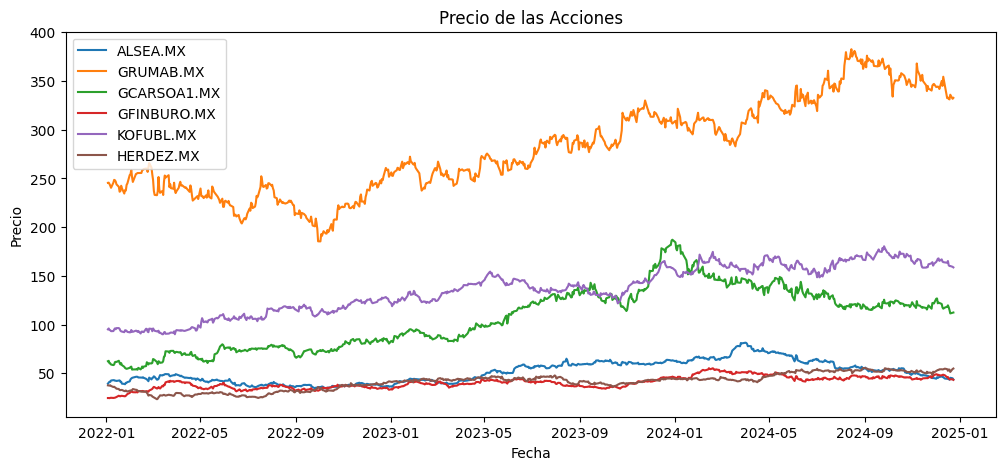

In [74]:
plt.figure(figsize = (12,5))
for i in df_precios.columns.values:
    plt.plot(df_precios[i], label = i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend(df_precios.columns.values)
plt.show()

In [75]:
df_precios_ren = np.log(df_precios).diff()
df_precios_ren = df_precios_ren.dropna()
df_precios_ren

,ALSEA.MX,GRUMAB.MX,GCARSOA1.MX,GFINBURO.MX,KOFUBL.MX,HERDEZ.MX
Date,,,,,,
2022-01-04 00:00:00-06:00,0.026925,0.000761,0.006927,0.000000,0.008981,-0.003005
2022-01-05 00:00:00-06:00,0.020982,-0.005830,-0.041020,-0.005314,-0.015434,-0.004273
2022-01-06 00:00:00-06:00,-0.002868,-0.007258,-0.001920,0.011410,-0.003603,0.007278
2022-01-07 00:00:00-06:00,0.034117,-0.008560,-0.020219,0.004044,-0.010157,-0.016896
2022-01-10 00:00:00-06:00,0.008064,0.021494,-0.009852,-0.006884,0.001002,-0.029946
...,...,...,...,...,...,...
2024-12-18 00:00:00-06:00,-0.021275,-0.004424,-0.017364,-0.036922,-0.026439,0.024642
2024-12-19 00:00:00-06:00,-0.021275,-0.001298,-0.023138,-0.015891,-0.005298,-0.002232
2024-12-20 00:00:00-06:00,0.046310,0.014362,-0.031109,0.001143,0.000250,-0.045527


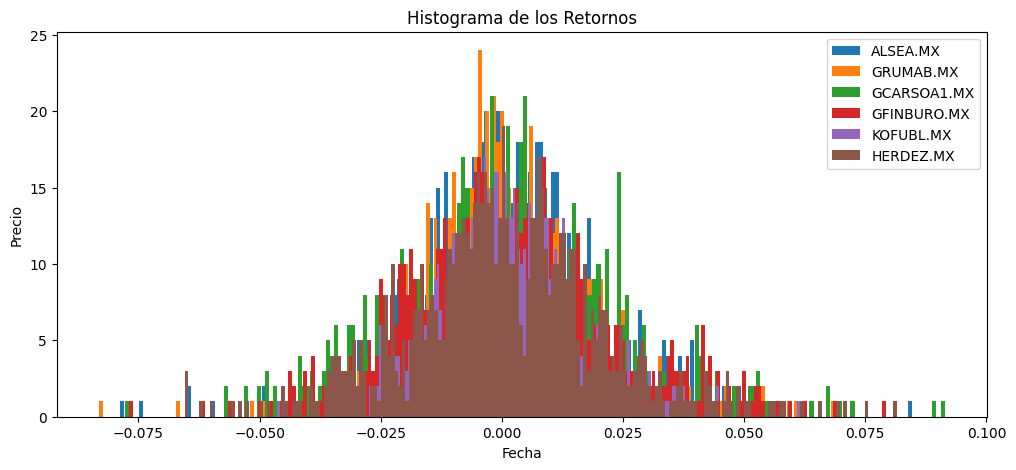

In [76]:
plt.figure(figsize = (12,5))
for i in df_precios_ren.columns.values:
    plt.hist(df_precios_ren[i], label = i, bins = 200)
plt.title('Histograma de los Retornos')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend(df_precios_ren.columns.values)
plt.show()


# Portafolios

In [77]:
Media = df_precios_ren.mean().values*252
Varianza = df_precios_ren.var().values*252
DesvEst = np.sqrt(Varianza)
matriz_cov = df_precios_ren.cov()*252
matriz_corr = df_precios_ren.corr()*252


In [78]:
print("Rendimiento de las Acciones \n", Media, "\n")

print("Desviacion Estandar de las Acciones \n", DesvEst, "\n")
print(Media / DesvEst)
print("Matriz de Varianzas y Covarianzas \n")


Rendimiento de las Acciones 
 [0.03437157 0.10228219 0.19822406 0.19033303 0.17228216 0.12722295] 

Desviacion Estandar de las Acciones 
 [0.29018491 0.27359941 0.35931663 0.33145029 0.23453809 0.32213712] 

[0.11844713 0.37383921 0.55166959 0.57424308 0.73455941 0.39493415]
Matriz de Varianzas y Covarianzas 



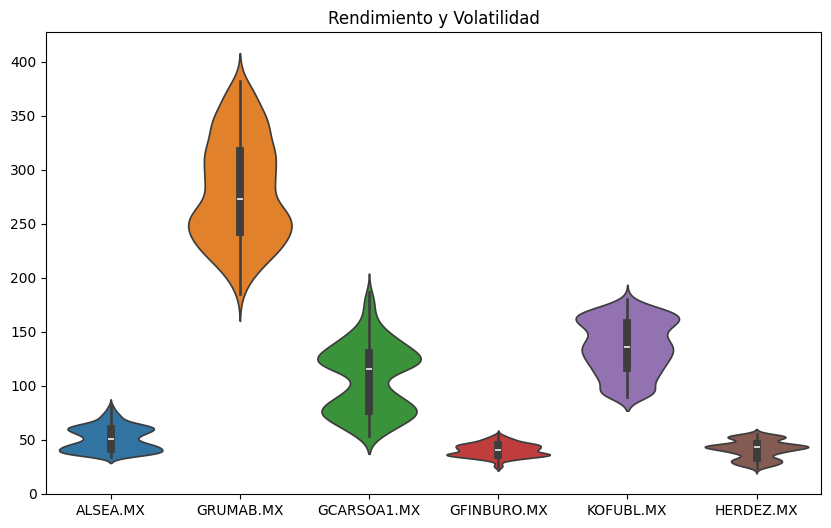

In [79]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_precios)
plt.title('Rendimiento y Volatilidad')
plt.show()

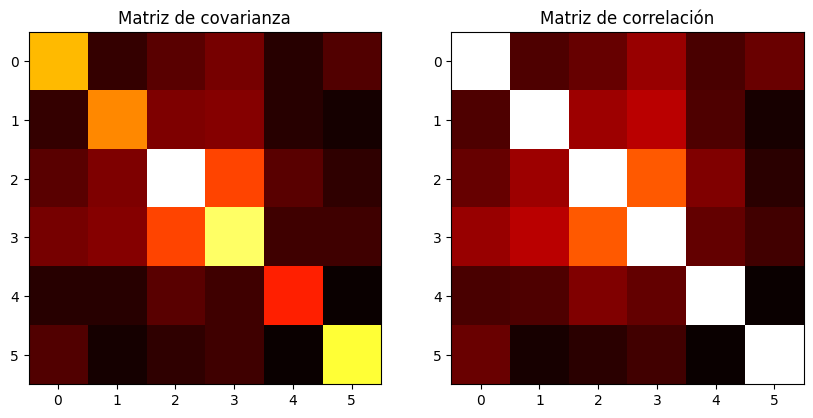

In [80]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.title("Matriz de covarianza")
plt.imshow(matriz_cov.values, cmap='hot', interpolation='nearest')

plt.subplot(1,2,2)
plt.title("Matriz de correlación")
plt.imshow(matriz_corr.values, cmap='hot', interpolation='nearest')


## Portafolio Sencillo

In [83]:
# Portafolio Sencillo

# Porcentaje a invertir en cada activo

############# Porcentaje Dinámico de las acciones el historico
# Lazo de carrado a partir de rendimiento y volatibilidad
# 

w_port_sen = [0.16]*n


# Ultimo precio observado
ultimo_precio = df_precios.iloc[-1].values

# Monto  por invertir en cada activo
montos = [Capital*i for i in w_port_sen]

# Numero de activos
n_activos = [math.floor(i/j) for i,j in zip(montos,ultimo_precio)]

# Monto Real a invertir
monto_real = [i*j for i,j in zip(ultimo_precio,n_activos)]

Port_Sencillo = pd.DataFrame(zip(activos,ultimo_precio,n_activos,monto_real,w_port_sen),
                             columns = ['Activos','Precio','# Activos','Monto','% Capital'])

Port_Sencillo['Precio'] = Port_Sencillo['Precio'].apply(lambda x: f"${x:.2f}")
Port_Sencillo['Monto'] = Port_Sencillo['Monto'].apply(lambda x: f"${x:.2f}")
Port_Sencillo['% Capital'] = Port_Sencillo['% Capital'].apply(lambda x: f"{x * 100:.2f}%")

print("Portafolio Sencillo \n")
### minidf

print(Port_Sencillo)

print('\nEl monto real a invertir es de',np.sum(monto_real))

# Rendimiento Portafolio
ren_port_sen = Media @ w_port_sen
fren = f"{ren_port_sen * 100:.2f}%"
print('El rendimiento del portafolio es de',fren)

# Volatilidad Portafolio
vol_port_sen = np.sqrt(w_port_sen @ matriz_cov @ w_port_sen)
fvol = f"{vol_port_sen:.4f}"
print('La volatilidad del portafolio es de',fvol)

# Cociente  de Sharpe
sharpe_port_sen = ren_port_sen/vol_port_sen
fsharpe = f"{sharpe_port_sen:.4f}"
print('El cociente de Sharpe es de',fsharpe)

Portafolio Sencillo 

       Activos   Precio  # Activos     Monto % Capital
0     ALSEA.MX   $43.51         25  $1087.75    16.00%
1    GRUMAB.MX  $332.66          3   $997.98    16.00%
2  GCARSOA1.MX  $112.32          9  $1010.88    16.00%
3  GFINBURO.MX   $43.19         25  $1079.75    16.00%
4    KOFUBL.MX  $158.65          7  $1110.55    16.00%
5    HERDEZ.MX   $54.80         20  $1096.00    16.00%

El monto real a invertir es de 6382.909873962402
El rendimiento del portafolio es de 13.20%
La volatilidad del portafolio es de 0.1667
El cociente de Sharpe es de 0.7916


## Portafolio de minima varianza (Minimo rieasgo)

porcentajes de ada accion pára minimizar el riesgo con las acciones que se le dan


In [84]:
# Portafolio de minima varianza

vector_unos = [1]*n

# Porcentaje a invertir en cada activo
w_port_min_var = (np.linalg.inv(matriz_cov) @ vector_unos)/(vector_unos @ np.linalg.inv(matriz_cov) @ vector_unos)

# Ultimo precio observado
ultimo_precio = df_precios.iloc[-1].values

# Monto  por invertir en cada activo
montos = [Capital*i for i in w_port_min_var]

# Numero de activos
n_activos = [math.floor(i/j) for i,j in zip(montos,ultimo_precio)]

# Monto Real a invertir
monto_real = [i*j for i,j in zip(ultimo_precio,n_activos)]

Port_Min_Var = pd.DataFrame(zip(activos,ultimo_precio,n_activos,monto_real,w_port_min_var),
                             columns = ['Activos','Precio','# Activos','Monto','% Capital'])

Port_Min_Var['Precio'] = Port_Min_Var['Precio'].apply(lambda x: f"${x:.2f}")
Port_Min_Var['Monto'] = Port_Min_Var['Monto'].apply(lambda x: f"${x:.2f}")
Port_Min_Var['% Capital'] = Port_Min_Var['% Capital'].apply(lambda x: f"{x * 100:.2f}%")

print("Portafolio Minima Varianza \n")
#print(Port_Min_Var)
print('\nEl monto real a invertir es de',np.sum(monto_real))

# Rendimiento Portafolio
ren_port_min_var = Media @ w_port_min_var
fren = f"{ren_port_min_var * 100:.2f}%"
print('El rendimiento del portafolio es de',fren)

# Volatilidad Portafolio
vol_port_min_var = np.sqrt(w_port_min_var @ matriz_cov @ w_port_min_var)
fvol = f"{vol_port_min_var:.4f}"
print('La volatilidad del portafolio es de',fvol)

# Cociente  de Sharpe
sharpe_port_min_var = ren_port_min_var/vol_port_min_var
fsharpe = f"{sharpe_port_min_var:.4f}"

# Cociente de chars relación riesgo rendimisneto

print('El cociente de Sharpe es de',fsharpe)
Port_Min_Var.head()

Portafolio Minima Varianza 


El monto real a invertir es de 6660.919849395752
El rendimiento del portafolio es de 12.77%
La volatilidad del portafolio es de 0.1568
El cociente de Sharpe es de 0.8147


,Activos,Precio,# Activos,Monto,% Capital
0,ALSEA.MX,$43.51,27,$1174.77,16.85%
1,GRUMAB.MX,$332.66,4,$1330.64,21.73%
2,GCARSOA1.MX,$112.32,2,$224.64,3.80%
3,GFINBURO.MX,$43.19,8,$345.52,5.03%
4,KOFUBL.MX,$158.65,15,$2379.75,34.86%


In [99]:
6660.919849395752 * 0.038

253.11495427703858

# Portafolio de maximo cociente de Sharpe

El mayo rendimiento con el menor riesgo en relación


In [85]:
# Portafolio de maximo cociente de Sharpe

vector_unos = [1]*n

# Porcentaje a invertir en cada activo
w_port_max_sharpe = (np.linalg.inv(matriz_cov) @ Media)/(vector_unos @ np.linalg.inv(matriz_cov) @ Media)

# Ultimo precio observado
ultimo_precio = df_precios.iloc[-1].values

# Monto  por invertir en cada activo
montos = [Capital*i for i in w_port_max_sharpe]

# Numero de activos
n_activos = [math.floor(i/j) for i,j in zip(montos,ultimo_precio)]

# Monto Real a invertir
monto_real = [i*j for i,j in zip(ultimo_precio,n_activos)]

Port_Max_Sharpe = pd.DataFrame(zip(activos,ultimo_precio,n_activos,monto_real,w_port_max_sharpe),
                             columns = ['Activos','Precio','# Activos','Monto','% Capital'])

Port_Max_Sharpe['Precio'] = Port_Max_Sharpe['Precio'].apply(lambda x: f"${x:.2f}")
Port_Max_Sharpe['Monto'] = Port_Max_Sharpe['Monto'].apply(lambda x: f"${x:.2f}")
Port_Max_Sharpe['% Capital'] = Port_Max_Sharpe['% Capital'].apply(lambda x: f"{x * 100:.2f}%")

print("Portafolio Maximo Cociente de Sharpe \n")
Port_Max_Sharpe.head(10)
print('\nEl monto real a invertir es de',np.sum(monto_real))

# Rendimiento Portafolio
ren_port_max_sharpe = Media @ w_port_max_sharpe
fren = f"{ren_port_max_sharpe * 100:.2f}%"
print('El rendimiento del portafolio es de',fren)

# Volatilidad Portafolio
vol_port_max_sharpe = np.sqrt(w_port_max_sharpe @ matriz_cov @ w_port_max_sharpe)
fvol = f"{vol_port_max_sharpe:.4f}"
print('La volatilidad del portafolio es de',fvol)

# Cociente  de Sharpe
sharpe_port_max_sharpe = ren_port_max_sharpe/vol_port_max_sharpe
fsharpe = f"{sharpe_port_max_sharpe:.4f}"
print('El cociente de Sharpe es de',fsharpe)
Port_Max_Sharpe.head(10)

Portafolio Maximo Cociente de Sharpe 


El monto real a invertir es de 6824.699840545654
El rendimiento del portafolio es de 17.72%
La volatilidad del portafolio es de 0.1846
El cociente de Sharpe es de 0.9595


,Activos,Precio,# Activos,Monto,% Capital
0,ALSEA.MX,$43.51,-17,$-739.67,-10.40%
1,GRUMAB.MX,$332.66,2,$665.32,9.83%
2,GCARSOA1.MX,$112.32,7,$786.24,11.84%
3,GFINBURO.MX,$43.19,29,$1252.51,18.00%
4,KOFUBL.MX,$158.65,22,$3490.30,50.99%
5,HERDEZ.MX,$54.80,25,$1370.00,19.75%


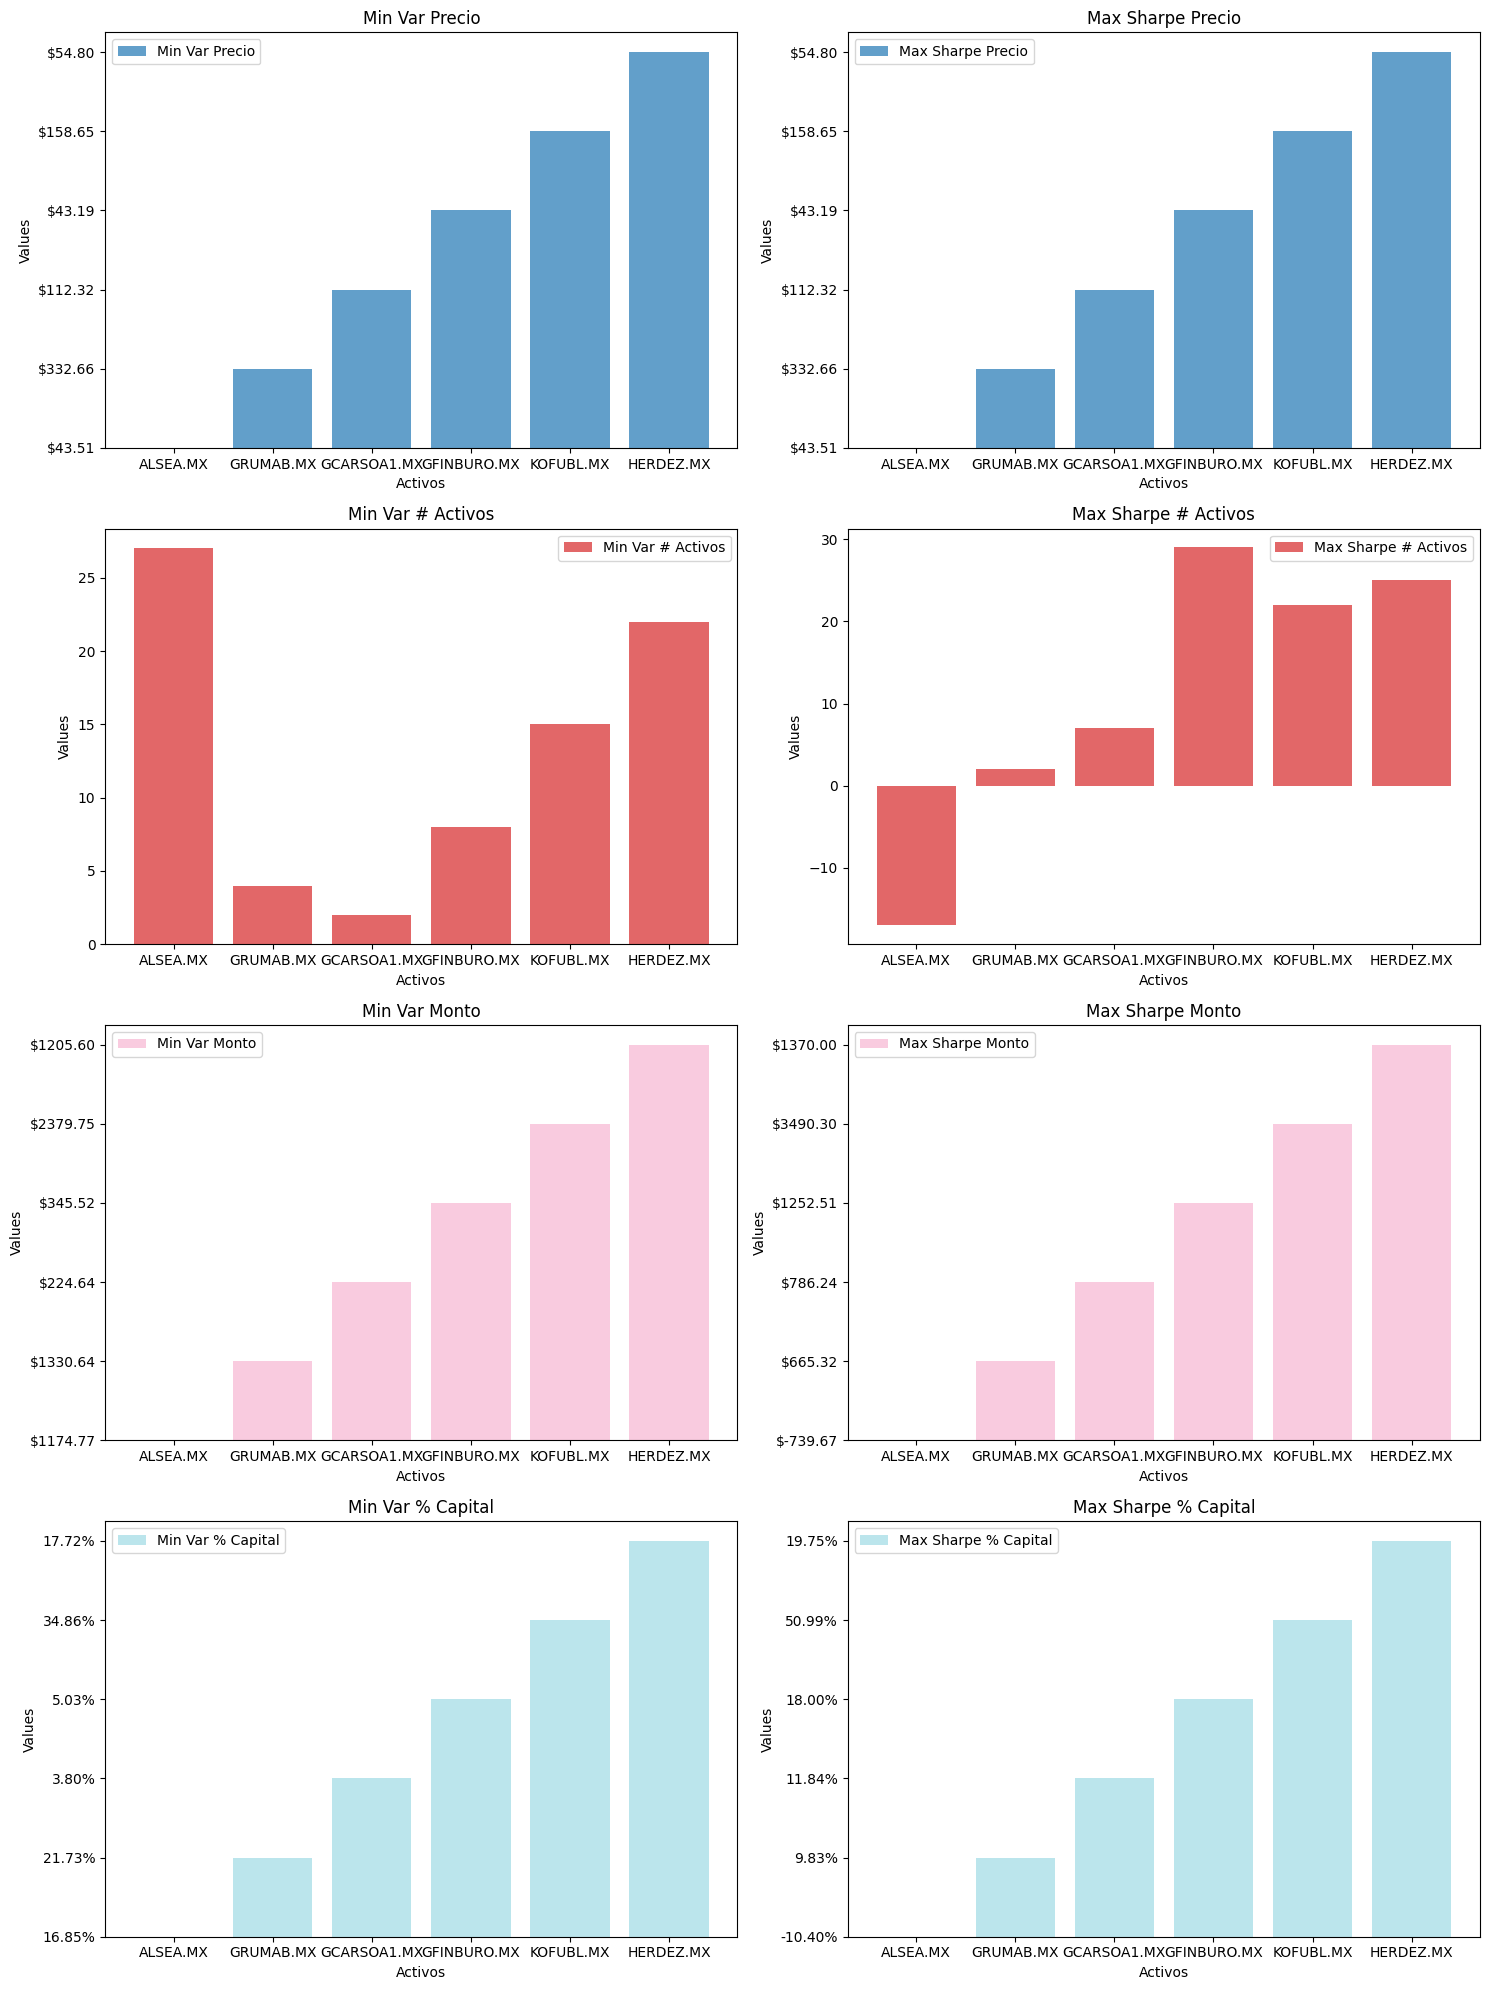

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

columns_to_compare = ['Activos', 'Precio', '# Activos', 'Monto', '% Capital']

df_min_var = Port_Min_Var[columns_to_compare]
df_max_sharpe = Port_Max_Sharpe[columns_to_compare]

fig, axes = plt.subplots(len(columns_to_compare) - 1, 2, figsize=(15, 20))

# Define colors for each column
colors = plt.cm.tab20(np.linspace(0, 1, len(columns_to_compare[1:])))

for i, column in enumerate(columns_to_compare[1:]):
    # Plot Min Var
    axes[i, 0].bar(df_min_var["Activos"], df_min_var[column], label=f'Min Var {column}', alpha=0.7, color=colors[i])
    axes[i, 0].set_title(f'Min Var {column}')
    axes[i, 0].set_xlabel('Activos')
    axes[i, 0].set_ylabel('Values')
    axes[i, 0].legend()

    # Plot Max Sharpe
    axes[i, 1].bar(df_max_sharpe["Activos"], df_max_sharpe[column], label=f'Max Sharpe {column}', alpha=0.7, color=colors[i])
    axes[i, 1].set_title(f'Max Sharpe {column}')
    axes[i, 1].set_xlabel('Activos')
    axes[i, 1].set_ylabel('Values')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

In [87]:
len(w_port_min_var)

6

In [88]:

vector_unos = [1]*n

A = vector_unos @ np.linalg.inv(matriz_cov) @ vector_unos
B = vector_unos @ np.linalg.inv(matriz_cov) @ Media
C = Media @ np.linalg.inv(matriz_cov) @ Media

ren_deseado = np.arange(0,1.01,.01)

mat = np.zeros((len(w_port_min_var), len(ren_deseado)))

v_LA = []
v_nB = []

for i in range (len(ren_deseado)):
    L = (C-B*ren_deseado[i])/(A*C-B**2)
    LA = L*A
    nB = 1 - LA
    v_LA.append(LA)
    v_nB.append(nB)

for k in range(len(w_port_min_var)):
    for i in range(len(ren_deseado)):
        mat[k, i] = v_LA[i]*w_port_min_var[k] + v_nB[i]*w_port_max_sharpe[k]
mat = mat.T

ren_port_min_esp = [i @ Media for i in mat]
vol_port_min_esp = np.sqrt([i @ matriz_cov @ i for i in mat])

mat_rednvsvol = np.stack([ren_port_min_esp, vol_port_min_esp], axis = 1)

In [89]:
df = pd.DataFrame(data = mat_rednvsvol, columns = ['Rendimiento', 'Volatilidad'])
df.index = ren_deseado
df.head()

,Rendimiento,Volatilidad
0.00,3.469447e-17,0.296833
0.01,1.000000e-02,0.280272
0.02,2.000000e-02,0.264146
0.03,3.000000e-02,0.248542
0.04,4.000000e-02,0.233563


In [90]:
activos

['ALSEA.MX',
 'GRUMAB.MX',
 'GCARSOA1.MX',
 'GFINBURO.MX',
 'KOFUBL.MX',
 'HERDEZ.MX']

In [91]:
mat[20,:]
activos

['ALSEA.MX',
 'GRUMAB.MX',
 'GCARSOA1.MX',
 'GFINBURO.MX',
 'KOFUBL.MX',
 'HERDEZ.MX']

# Bala del señor Markowitz

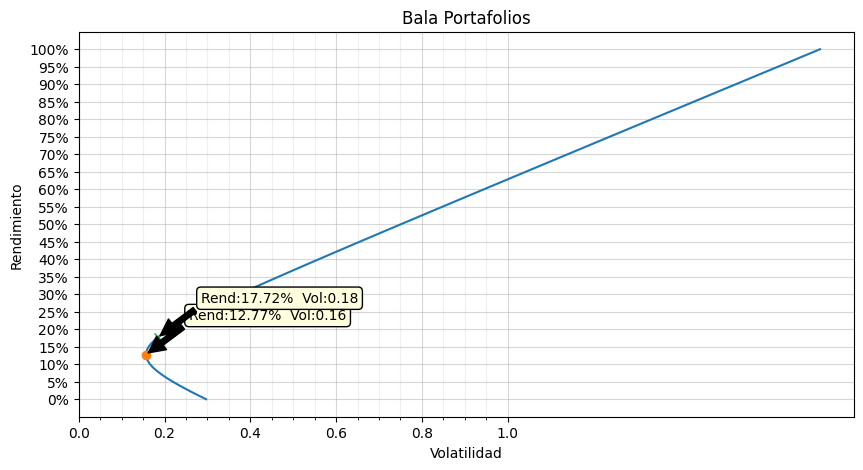

In [92]:
plt.figure(figsize = (10,5))
plt.plot(vol_port_min_esp, ren_port_min_esp)
plt.plot(vol_port_min_var,(ren_port_min_var), "o")
plt.plot(vol_port_max_sharpe,(ren_port_max_sharpe), "x")


plt.title('Bala Portafolios')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')

major_ticks = np.arange(0, 1.2, 0.2)  # Incrementos de 0.2
minor_ticks = np.arange(0, 1.05, 0.05)  # Incrementos de 0.05

plt.xticks(major_ticks)

plt.gca().set_xticks(minor_ticks, minor=True)

plt.grid(which='both')
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)

def y_formatter(x, pos):
    return f'{x * 100:.0f}%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(y_formatter))
plt.gca().yaxis.set_minor_formatter(FuncFormatter(y_formatter))

plt.yticks(minor_ticks)

annotation = plt.annotate(
    f'Rend:{ren_port_min_var*100:.2f}%  Vol:{vol_port_min_var:.2f}',
    xy=(vol_port_min_var, ren_port_min_var),
    xytext=(vol_port_min_var + 0.1, ren_port_min_var + 0.1),
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightyellow")
)

annotation = plt.annotate(
    f'Rend:{ren_port_max_sharpe*100:.2f}%  Vol:{vol_port_max_sharpe:.2f}',
    xy=(vol_port_max_sharpe, ren_port_max_sharpe),
    xytext=(vol_port_max_sharpe + 0.1, ren_port_max_sharpe + 0.1),
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightyellow")
)
    
plt.show()
